In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import plotly.express as px

import statsmodels.api as sm

from IPython.display import display

## Limpeza dos dados

In [152]:
df0 = pd.read_csv('sao-paulo-properties-april-2019.csv')
display(df0.head(3))
display(df0.shape)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


(13640, 16)

In [153]:
rent = df0['Negotiation Type'] == 'rent'
df = df0.loc[rent,['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District']]

# df para regressão linear
df_rl = df.drop(columns='District', axis=1)

In [154]:
df['District'] = df['District'].astype('category')

df['Swimming Pool'] = df['Swimming Pool'].astype('category')
df['New'] = df['New'].astype('category')
df['Furnished'] = df['Furnished'].astype('category')
df['Elevator'] = df['Elevator'].astype('category')

In [155]:
df['Swimming Pool'].cat.categories = ['No', 'Yes']
df['Furnished'].cat.categories = ['No', 'Yes']
df['Elevator'].cat.categories = ['No', 'Yes']
df['New'].cat.categories = ['No', 'Yes']
df['Swimming Pool'].cat.categories = ['No', 'Yes']

In [156]:
df[['District','City']] = df['District'].str.split('/', expand = True)
display(df.City.unique())

array(['São Paulo'], dtype=object)

In [157]:
df = df.drop(columns='City', axis=1)
df['District'] = df['District'].astype('category')

## Análize dos dados

## test train

In [164]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

## Regressão Linear

`Explicaremos aqui todos os nossos passos, quem quiser entender melhor como funciona regressão linear pode ler sobre no seguinte site: https://www.ibm.com/br-pt/analytics/learn/linear-regression`

In [165]:
def regress(Y, X):

    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    r = model.fit()
    
    return r

In [166]:
X_train['Swimming Pool'] = X_train['Swimming Pool'].astype('category')
X_train['New'] = X_train['New'].astype('category')
X_train['Furnished'] = X_train['Furnished'].astype('category')
X_train['Elevator'] = X_train['Elevator'].astype('category')

X_train['Swimming Pool'].cat.categories = ['0', '1']
X_train['Furnished'].cat.categories = ['0', '1']
X_train['Elevator'].cat.categories = ['0', '1']
X_train['New'].cat.categories = ['0', '1']

X_train['Swimming Pool'] = X_train['Swimming Pool'].astype('int64')
X_train['New'] = X_train['New'].astype('int64')
X_train['Furnished'] = X_train['Furnished'].astype('int64')
X_train['Elevator'] = X_train['Elevator'].astype('int64')

`Adapitamos os nossos dados qualitativos para ficarem na forma binária e podermos fazer regressão linear com todas variáveis relevantes`

In [167]:
Y = y_train['Price']
X = X_train[['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New']]
results = regress(Y,X)
results.summary()
results.pvalues

const             8.906199e-01
Condo             2.192569e-43
Size             8.916965e-156
Rooms             3.086652e-50
Toilets           7.803119e-03
Suites            5.839098e-02
Parking           3.787347e-17
Elevator          1.529014e-01
Furnished         3.695950e-43
Swimming Pool     3.905467e-04
New               7.742408e-01
dtype: float64

In [168]:
X = X.drop(columns='New', axis=1)
results = regress(Y,X)
results.summary()
results.pvalues

const             8.868752e-01
Condo             2.083484e-43
Size             8.003297e-156
Rooms             3.155231e-50
Toilets           7.731382e-03
Suites            5.849949e-02
Parking           3.911884e-17
Elevator          1.485400e-01
Furnished         3.672589e-43
Swimming Pool     3.953153e-04
dtype: float64

In [169]:
X = X.drop(columns='Elevator', axis=1)
results = regress(Y,X)
results.summary()
results.pvalues

const             8.118957e-01
Condo             2.113042e-43
Size             1.083067e-156
Rooms             5.734968e-50
Toilets           1.310419e-02
Suites            4.972724e-02
Parking           1.765640e-17
Furnished         8.931940e-43
Swimming Pool     6.706024e-04
dtype: float64

In [170]:
X = X.drop(columns='Suites', axis=1)
results = regress(Y,X)
results.summary()
results.pvalues

const             1.198261e-01
Condo             7.684512e-43
Size             1.041524e-160
Rooms             1.941865e-50
Toilets           5.448455e-13
Parking           3.670623e-19
Furnished         5.786382e-43
Swimming Pool     5.006387e-04
dtype: float64

In [171]:
X = X.drop(columns='Swimming Pool', axis=1)
results = regress(Y,X)
results.pvalues

const         2.066134e-01
Condo         2.853670e-44
Size         2.524286e-158
Rooms         1.597524e-49
Toilets       2.181445e-14
Parking       1.109603e-22
Furnished     1.970909e-47
dtype: float64

In [172]:
X = X.drop(columns='Toilets', axis=1)
results = regress(Y,X)
results.pvalues

const         2.459250e-01
Condo         1.063377e-43
Size         5.283442e-188
Rooms         3.992929e-44
Parking       1.420912e-38
Furnished     2.293540e-51
dtype: float64

In [173]:
X = X.drop(columns='Parking', axis=1)
results = regress(Y,X)
results.pvalues

const         7.556512e-03
Condo         9.334929e-72
Size         4.566645e-239
Rooms         1.094247e-28
Furnished     2.282581e-58
dtype: float64

In [174]:
X = X.drop(columns='Rooms', axis=1)
results = regress(Y,X)
results.pvalues

const         3.452242e-28
Condo         1.420614e-78
Size         1.311498e-223
Furnished     1.088813e-67
dtype: float64

In [175]:
X = X.drop(columns='Furnished', axis=1)
results = regress(Y,X)
results.pvalues

const     1.328271e-10
Condo     8.931316e-97
Size     2.498904e-193
dtype: float64

`Calculamos o valor p entre as variáveis e retiramos uma a uma as seguintas variáveis nessa ordem: New, Elevator, Suites, Swimming Pool, Toilets, Parking, Rooms, Furnished.`

In [176]:
%matplotlib notebook


from mpl_toolkits.mplot3d import Axes3D

from scipy import stats 

In [177]:
beta0_hat = results.params[0]  # const
beta1_hat = results.params[1]  # Condo
beta2_hat = results.params[2]  # Size

`"Puxamos" do resultado da regressão linear o β0, β do Condo e o β do Size`

In [178]:
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [179]:
npoints = 100
feature1 = X['Condo']
feature2 = X['Size']
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

fit_z = f(eixo_x, eixo_y)

<IPython.core.display.Javascript object>


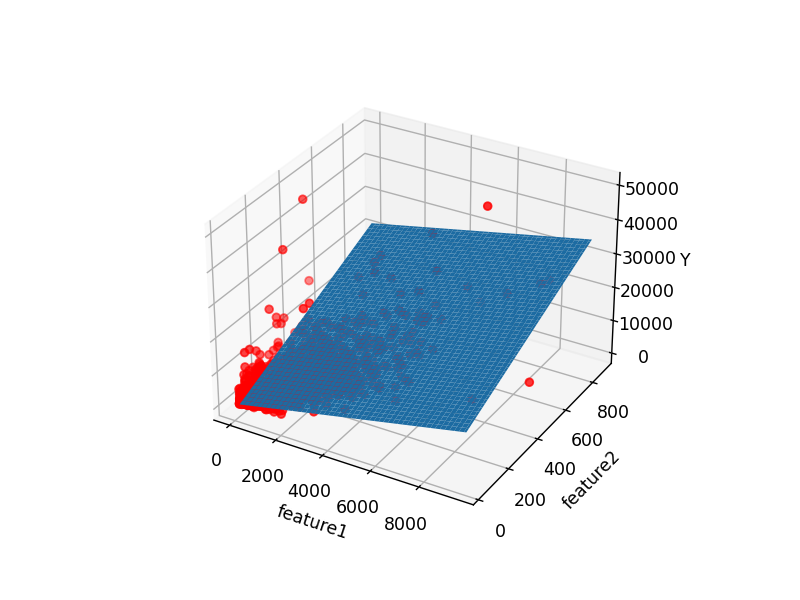

C:\Users\pedro\AppData\Local\Temp\ipykernel_18580\2163439244.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt3d = plt.figure().gca(projection="3d");


In [180]:
plt3d = plt.figure().gca(projection="3d");
plt3d.plot_surface(eixo_x, eixo_y, fit_z);
plt3d.scatter(feature1, feature2, Y, color="r");
plt3d.set_xlabel("feature1");
plt3d.set_ylabel("feature2");
plt3d.set_zlabel("Y");
plt.show();

<IPython.core.display.Javascript object>


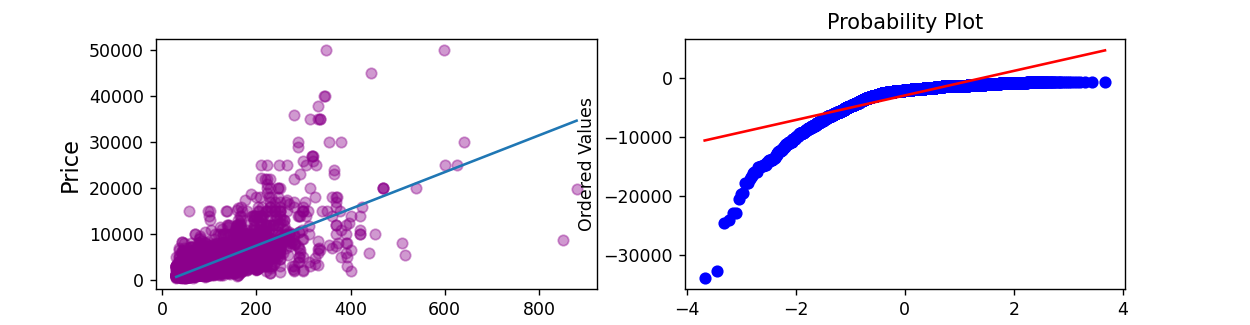

In [181]:
X = X_train['Size']
Y = y_train['Price']

med_x = X.mean()
med_y = Y.mean()

beta1 = X.cov(Y)/X.var()
beta0 = med_y-beta1*med_x

x_vec = np.linspace(X.min(), X.max(), 1000)
y_vec = beta0 + beta1*x_vec

fig = plt.figure(figsize=(10, 2.6))

plt.subplot(1,2,1)
plt.scatter(X, Y, alpha=0.4, color='darkmagenta')
plt.plot(x_vec, y_vec)
plt.xlabel('Size', fontsize=13)
plt.ylabel('Price', fontsize=13)

e = X - beta0 - beta1*X

plt.subplot(1,2,2)
stats.probplot(e, dist='norm', plot=plt)
plt.show()

<IPython.core.display.Javascript object>


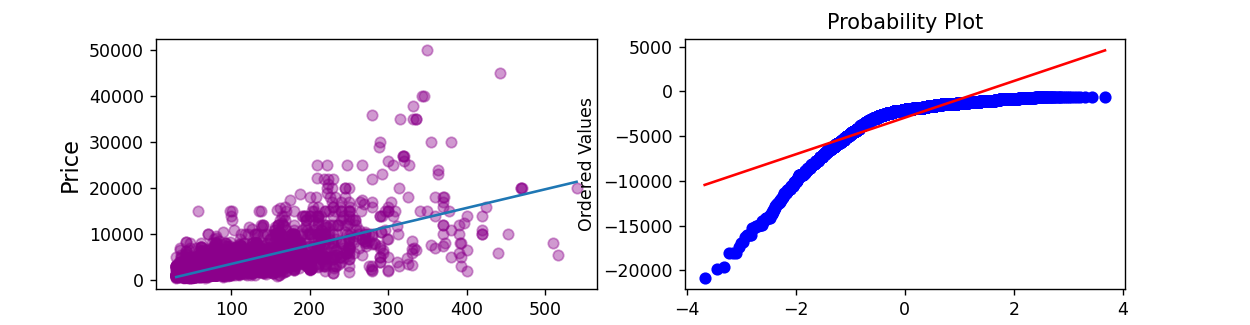

In [182]:
test = X_train['Size']<=590

X = X_train.loc[test, ['Size']]
Y = y_train.loc[test, ['Price']]

med_x = X.Size.mean()
med_y = Y.Price.mean()

beta1 = X.Size.cov(Y.Price)/X.Size.var()
beta0 = med_y-beta1*med_x
x_vec = np.linspace(X.Size.min(), X.Size.max(), 1000)
y_vec = beta0 + beta1*x_vec

fig = plt.figure(figsize=(10, 2.6))

plt.subplot(121)
plt.scatter(X.Size, Y.Price, alpha=0.4, color='darkmagenta')
plt.plot(x_vec, y_vec)
plt.xlabel('Size', fontsize=13)
plt.ylabel('Price', fontsize=13)

e = X.Size - beta0 - beta1*X.Size

plt.subplot(122)
stats.probplot(e, dist='norm', plot=plt)
plt.show()

<IPython.core.display.Javascript object>


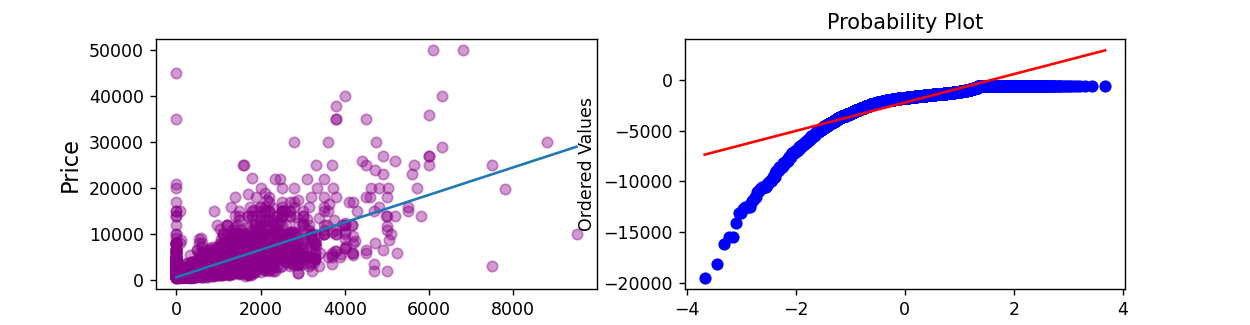

In [183]:
X = X_train['Condo']
Y = y_train['Price']

med_x = X.mean()
med_y = Y.mean()

beta1 = X.cov(Y)/X.var()
beta0 = med_y-beta1*med_x

x_vec = np.linspace(X.min(), X.max(), 1000)
y_vec = beta0 + beta1*x_vec

fig = plt.figure(figsize=(10, 2.6))

plt.subplot(121)
plt.scatter(X, Y, alpha=0.4, color='darkmagenta')
plt.plot(x_vec, y_vec)
plt.xlabel('Condo', fontsize=13)
plt.ylabel('Price', fontsize=13)

e = X - beta0 - beta1*X

plt.subplot(122)
stats.probplot(e, dist='norm', plot=plt)
plt.show()

<IPython.core.display.Javascript object>


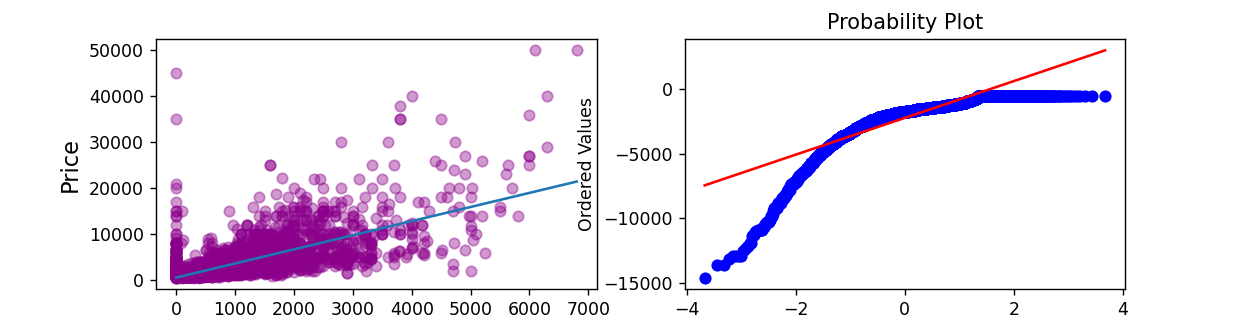

In [184]:
test = X_train['Condo']<=7000

X = X_train.loc[test, ['Condo']]
Y = y_train.loc[test, ['Price']]

med_x = X.Condo.mean()
med_y = Y.Price.mean()

beta1 = X.Condo.cov(Y.Price)/X.Condo.var()
beta0 = med_y-beta1*med_x
x_vec = np.linspace(X.Condo.min(), X.Condo.max(), 1000)
y_vec = beta0 + beta1*x_vec

fig = plt.figure(figsize=(10, 2.6))

plt.subplot(121)
plt.scatter(X.Condo, Y.Price, alpha=0.4, color='darkmagenta')
plt.plot(x_vec, y_vec)
plt.xlabel('Condo', fontsize=13)
plt.ylabel('Price', fontsize=13)

e = X.Condo - beta0 - beta1*X.Condo

plt.subplot(122)
stats.probplot(e, dist='norm', plot=plt)
plt.show()

<IPython.core.display.Javascript object>


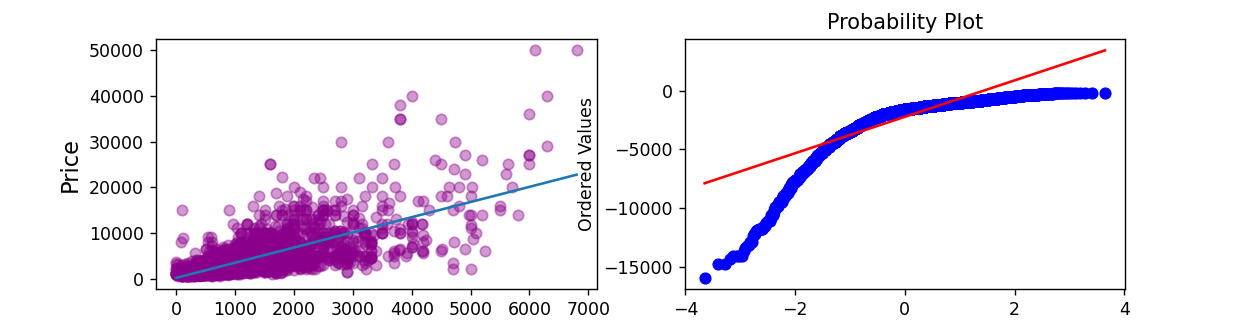

In [185]:
test = X_train['Condo']<=7000
X = X_train.loc[test, ['Condo']]
Y = y_train.loc[test, ['Price']]

test = X.Condo > 0
X = X.loc[test, ['Condo']]
Y = Y.loc[test, ['Price']]

med_x = X.Condo.mean()
med_y = Y.Price.mean()

beta1 = X.Condo.cov(Y.Price)/X.Condo.var()
beta0 = med_y-beta1*med_x
x_vec = np.linspace(X.Condo.min(), X.Condo.max(), 1000)
y_vec = beta0 + beta1*x_vec

fig = plt.figure(figsize=(10, 2.6))

plt.subplot(121)
plt.scatter(X.Condo, Y.Price, alpha=0.4, color='darkmagenta')
plt.plot(x_vec, y_vec)
plt.xlabel('Condo', fontsize=13)
plt.ylabel('Price', fontsize=13)

e = X.Condo - beta0 - beta1*X.Condo

plt.subplot(122)
stats.probplot(e, dist='norm', plot=plt)
plt.show()

### Referêcias

- Base de dados: https://www.kaggle.com/code/juxwzera/predictions-for-price/data
- Análise de dados e previsão de preços: https://www.kaggle.com/code/juxwzera/predictions-for-price
- Algumas funções do statsmodels.api: https://www.statsmodels.org/stable/gettingstarted.html
- Exemplo de regressão linear: https://pt.linkedin.com/pulse/regressão-linear-simples-e-múltipla-em-python-100-prático-santos